In [9]:
import pandas as pd 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from  sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import f_oneway

Công ty ô tô Geely Auto của Trung Quốc muốn gia nhập thị trường Mỹ bằng cách thành lập nhà máy sản xuất của họ ở Mỹ để tạo sức cạnh tranh với các đối thủ Mỹ và Châu âu tại thị trường Mỹ. Công ty Geely Auto đã ký hợp đồng với một công ty tư vấn ôtô để tìm hiểu các yếu tác động tới giá ô tô. Cụ thể họ muốn tìm hiểu các đặc điểm của một chiếc xe sẽ ảnh hưởng tới việc định giá ô tô tại thị trường Mỹ, vì có thể thị hiếu của người tiêu dùng Mỹ có điểm khác biệt so với người tiêu dùng ở Trung quốc. Công ty muốn biết:

- Có những thuộc tính nào có ý nghĩa trong việc định giá của một chiếc xe hơi
- Các thuộc tính đó có liên hệ với giá xe như thế nào
- => Dựa trên các cuộc khảo sát thị trường, công ty tư vấn đã thu thập một tập dữ liệu về các loại
ô tô khác nhau trên thị trường Mỹ để phân tích.

# Thông tin
- car_ID : Mã xe
- symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro)
- carName: Tên xe
- fueltype: Loại nhiên liệu
- aspiration: loại hút (turbo hoặc std)
- doornumber: Số lượng cửa
- carbody: Loại thân xe (sedan, wagon, hatchback)
- drivewheel: Loại bánh xe
- enginelocation: Vị trí động cơ
- wheelbase: Chiều dài cơ sở
- carlength: Chiều dài xe
- carwidth: Chiều rộng xe
- carheight: Chiều cao xe
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- enginetype: Loại động cơ
- cylindernumber: Số lượng xi lanh đặt trong xe
- enginesize: Kích thước động cơ
- fuelsystem: Hệ thống nhiên liệu của xe ô tô
- boreratio: Tỉ số hành trình
- stroke: số kỳ hoăc kích thước bên trong động cơ
- compressionratio: Tỉ số nén của ôtô
- horsepower: Mã lực
- peakrpm: Tốc độ động cơ cao nhất
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
- price: Giá xe

In [10]:
# Đọc dữ liệu
df = pd.read_csv('Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
def normalize(df):
    max_column  = df.max()
    min_column  = df.min()
    df_nor = (df - df.min()) / (df.max()-df.min())
    return max_column, min_column, df_nor

In [14]:
features =["carlength", "carwidth", "carheight", "fueltype", "drivewheel",
            "carbody", "enginesize", "price", "CarName", "symboling", "aspiration","horsepower","peakrpm","highwaympg","compressionratio","enginelocation"]

In [15]:
df_target = df[features]
# category = one-hot
df_target = pd.get_dummies(df_target, columns =["fueltype", "carbody", "drivewheel", "CarName","symboling","aspiration","enginelocation"], dummy_na=True)

In [16]:
y = df_target["price"]
X = df_target.drop("price", axis=1)

In [17]:
# # chia du lieu 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
reg = LinearRegression().fit(X_train, y_train)
# 
# a = reg.coef_
# b = reg.intercept_

In [19]:
# # metrics
pred = reg.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_percentage_error(y_test, pred))

21043166.843290534
0.21061243635669033


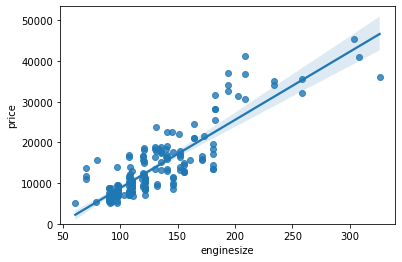

In [20]:
sns.regplot(x ='enginesize', y ='price', data = df_target)
plt.ylim(0, )
plt.show()

In [21]:
list(df_target.columns)

['carlength',
 'carwidth',
 'carheight',
 'enginesize',
 'price',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'compressionratio',
 'fueltype_diesel',
 'fueltype_gas',
 'fueltype_nan',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'carbody_nan',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'drivewheel_nan',
 'CarName_Nissan versa',
 'CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x4',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick electra 225 custom',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk'

In [22]:
# ANOVA(p_value <0.05 chap nhan H0 bac bo H1)
statistics = f_oneway(df_target.loc[:,"enginelocation_rear"], df_target.loc[:,"price"])
statistics

F_onewayResult(statistic=566.1937773509779, pvalue=4.022033005852007e-79)